<a href="https://colab.research.google.com/github/Goncalotramps/fisica2_lab/blob/main/tratamento_fotoeletro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[2.12256264e+30 3.38213107e+30 5.30619639e+30 8.19670251e+30
 1.24668862e+31 1.86698051e+31 2.75286263e+31 3.99661455e+31
 5.71298335e+31 8.04075110e+31 1.11427721e+32 1.52038244e+32
 2.04256275e+32 2.70184817e+32 3.51892038e+32 4.51253837e+32
 5.69764444e+32 7.08325288e+32 8.67027991e+32 1.04495228e+33
 1.24000308e+33 1.44881202e+33 1.66672628e+33 1.88790220e+33
 2.10551176e+33 2.31205850e+33 2.49978658e+33 2.66115404e+33
 2.78933107e+33 2.87867795e+33 2.92515624e+33 2.92663135e+33
 2.88303518e+33 2.79637127e+33 2.67056215e+33 2.51115496e+33
 2.32491622e+33 2.11935675e+33 1.90223337e+33 1.68107269e+33
 1.46275690e+33 1.25320116e+33 1.05713972e+33 8.78025152e+32
 7.18033146e+32 5.78155946e+32 4.58361854e+32 3.57795527e+32
 2.74994694e+32 2.08102208e+32 1.55057234e+32 1.13754960e+32
 8.21696849e+31 5.84407617e+31 4.09244717e+31 2.82171576e+31
 1.91560700e+31 1.28044973e+31 8.42716734e+30 5.46089306e+30]


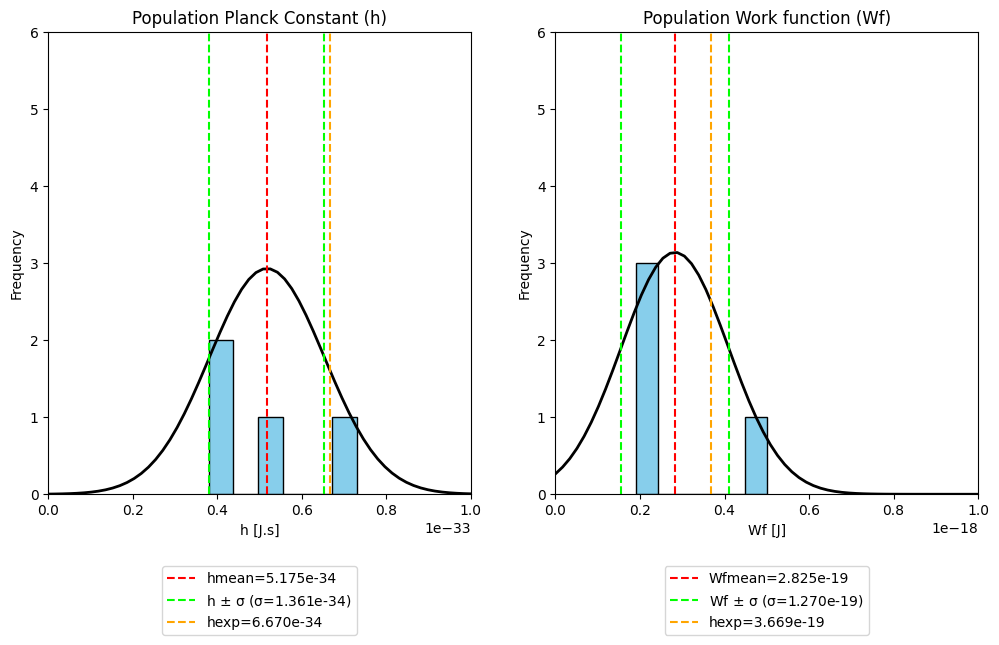

In [40]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

from scipy.stats import norm
import statistics

#import columns A through C from Excel file
df = pd.read_excel('tratamento_estatistico2.xlsx')

# Generate random data for the histogram
data = df["h"]

data= data[np.isfinite(data)]

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
# Plotting a basic histogram
plt.hist(data, bins=6, color='skyblue', edgecolor='black')

hexp=6.67e-34 #Put experimental value

n=1 #number of sigmas necessary to include our results
mu, std = norm.fit(data)

limsup=6

# Plot the PDF.
xmin, xmax = plt.xlim(0,10e-34)
x = np.linspace(xmin, xmax, 60)
p = norm.pdf(x, mu, std)


plt.plot(x, p*pow(10,-33), 'k', linewidth=2)

print(p)
plt.plot([mu,mu],[0,limsup],ls="--",c="red",label="hmean={:.3e}".format(mu))
if n==1:
  labelsigma="h $\pm$ \u03C3 (\u03C3={:.3e})".format(std)
else:
  labelsigma="h $\pm$ {:.1f}\u03C3 (\u03C3={:.3e})".format(n,std)

plt.plot([mu-n*std,mu-n*std],[0,limsup],ls="--",c="lime",label=labelsigma)
plt.plot([mu+n*std,mu+n*std],[0,limsup],ls="--",c="lime")
plt.plot([hexp,hexp],[0,limsup],ls="--",c="orange",label=r"hexp={:.3e}".format(hexp))

plt.ylim(0,limsup)

plt.legend(bbox_to_anchor=(0.5, -0.23), loc="center", borderaxespad=0)

# Adding labels and title
plt.xlabel('h [J.s]')
plt.ylabel('Frequency')
plt.xlim(0,10e-34)
plt.title("Population Planck Constant (h)")

# Display the plot
plt.savefig("tratamento_dados_h.png")


######################################## For work function ##############################################################################

data = df["Wf"]

data= data[np.isfinite(data)]

plt.subplot(1, 2, 2)
# Plotting a basic histogram
plt.hist(data, bins=6, color='skyblue', edgecolor='black')

wf_exp= 2.29*1.602e-19#Put experimental value

n=1 #number of sigmas necessary to include our results
mu, std = norm.fit(data)

# Plot the PDF.
xmin, xmax = plt.xlim(0,10e-19)
x = np.linspace(xmin, xmax, 60)
p = norm.pdf(x, mu, std)

plt.plot(x, p*pow(10,-18), 'k', linewidth=2)


plt.plot([mu,mu],[0,limsup],ls="--",c="red",label="Wfmean={:.3e}".format(mu))
if n==1:
  labelsigma="Wf $\pm$ \u03C3 (\u03C3={:.3e})".format(std)
else:
  labelsigma="Wf $\pm$ {:.1f}\u03C3 (\u03C3={:.3e})".format(n,std)

plt.plot([mu-n*std,mu-n*std],[0,limsup],ls="--",c="lime",label=labelsigma)
plt.plot([mu+n*std,mu+n*std],[0,limsup],ls="--",c="lime")
plt.plot([wf_exp,wf_exp],[0,limsup],ls="--",c="orange",label=r"hexp={:.3e}".format(wf_exp))

plt.ylim(0,limsup)
plt.xlim(0,10e-19)

plt.legend(bbox_to_anchor=(0.5, -0.23), loc="center", borderaxespad=0)

# Adding labels and title
plt.xlabel('Wf [J]')
plt.ylabel('Frequency')
plt.title("Population Work function (Wf)")
# Display the plot
plt.savefig("tratamento_dados.png")


